In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
%matplotlib inline

In [4]:
data = []
i = 0
for yr in range(2009,2019):
    path = 'C:/Users/PC/Downloads/' + str(yr) + '/*.xlsx'
    files = glob.glob(path)
    for f in files:
        dt = pd.read_excel(f)
        colnames = list(dt.iloc[15])
        dt = dt.iloc[16:]
        dt.columns = colnames
        data.append(dt)
        i += 1
        print(i)
   
print('--Done--')
df = pd.concat(data)
df.head()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
--Done--


,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),대지면적(㎡),거래금액(만원),층,계약년월,계약일,지분구분,건축년도
16,강원도 강릉시 강문동,일반,3**,창해로,자연환경보전,제1종근린생활,12m미만,2757.92,2094.05,"83,800",NaN,200906,11~20,,1995
17,강원도 강릉시 강문동,집합,1**,창해로,자연환경보전,숙박,12m미만,4.15,,200,2,200906,21~30,지분,1990
18,강원도 강릉시 사천면 사천진리,일반,1**,손맞이길,관리,제1종근린생활,8m미만,926.88,4046.00,"50,000",NaN,200906,11~20,,2002
19,강원도 강릉시 주문진읍 교항리,일반,1**,해안로,일반상업,숙박,25m미만,2995.78,1422.00,"190,000",NaN,200906,11~20,,1998
20,강원도 강릉시 주문진읍 교항리,일반,1**,해안로,일반상업,숙박,25m미만,2995.78,1422.00,"190,000",NaN,200906,21~30,,1998


In [5]:
###### 데이터 입력
df = pd.concat(data)
print(df.columns)

###### 전처리
# 열 추가
df['시'] = df['시군구'].str.split(' ').str.get(0)
df['구'] = df['시군구'].str.split(' ').str.get(1)
df['동'] = df['시군구'].str.split(' ').str.get(2)
df['계약년도'] = df['계약년월'].astype(str).str.extract('(\d{4})(\d{2})', expand=False)[0].astype(int)
df['계약월'] = df['계약년월'].astype(str).str.extract('(\d+)(\d+)', expand=False)[1].astype(int)
df['계약일'] = (df['계약일'].astype(str).str.extract('(\d+)~(\d+)', expand=False).astype(int)[0]+df['계약일'].astype(str).str.extract('(\d+)~(\d+)', expand=False).astype(int)[1])/2

# 형 변환
df['거래금액(만원)'] = df['거래금액(만원)'].str.replace(',','').astype(float)
#df['층'] = df['층'].astype('np.int64')


# 열 삭제
df = df.drop(['시군구','지번','계약년월','지분구분'], axis=1)

# 열 이름 변환
df.columns = ['type','street','usage_area','main_usage','road','area','land_area','price','floor','contract_d','yoc','si','gu','dong','contract_y','contract_m']
df = df[['type','street','usage_area','main_usage','road','area','land_area','price','floor','yoc','si','gu','dong','contract_y','contract_m','contract_d']]
df.head()

# 형 변환
df['area'] = df['area'].astype(float)

Index(['시군구', '유형', '지번', '도로명', '용도지역', '건축물주용도', '도로조건', '전용/연면적(㎡)',
       '대지면적(㎡)', '거래금액(만원)', '층', '계약년월', '계약일', '지분구분', '건축년도'],
      dtype='object')


,type,street,usage_area,main_usage,road,area,land_area,price,floor,yoc,si,gu,dong,contract_y,contract_m,contract_d
16,일반,창해로,자연환경보전,제1종근린생활,12m미만,2757.92,2094.05,83800.0,NaN,1995,강원도,강릉시,강문동,2009,6,15.5
17,집합,창해로,자연환경보전,숙박,12m미만,4.15,,200.0,2,1990,강원도,강릉시,강문동,2009,6,25.5
18,일반,손맞이길,관리,제1종근린생활,8m미만,926.88,4046.00,50000.0,NaN,2002,강원도,강릉시,사천면,2009,6,15.5
19,일반,해안로,일반상업,숙박,25m미만,2995.78,1422.00,190000.0,NaN,1998,강원도,강릉시,주문진읍,2009,6,15.5
20,일반,해안로,일반상업,숙박,25m미만,2995.78,1422.00,190000.0,NaN,1998,강원도,강릉시,주문진읍,2009,6,25.5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761934 entries, 16 to 4050
Data columns (total 16 columns):
type          761934 non-null object
street        761934 non-null object
usage_area    761927 non-null object
main_usage    761934 non-null object
road          761934 non-null object
area          761934 non-null object
land_area     761934 non-null object
price         761934 non-null float64
floor         397107 non-null object
yoc           749295 non-null object
si            761934 non-null object
gu            761934 non-null object
dong          761255 non-null object
contract_y    761934 non-null int32
contract_m    761934 non-null int32
contract_d    761934 non-null float64
dtypes: float64(2), int32(2), object(12)
memory usage: 113.0+ MB


In [6]:
# 데이터 개수
len(df)

761934

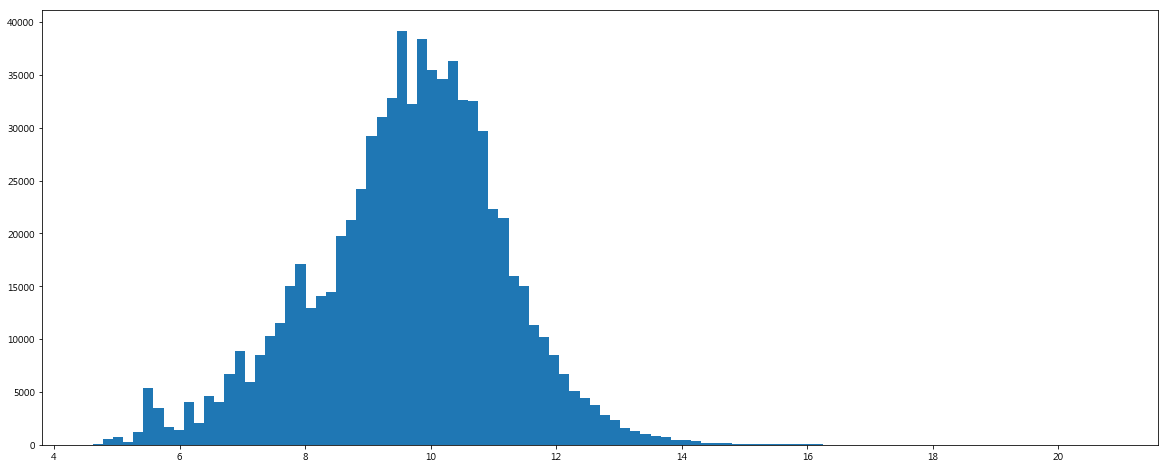

In [7]:
# 거래금액 분포
plt.figure(figsize=(20,8))
plt.hist(np.log(df['price']), bins=100)
plt.show()

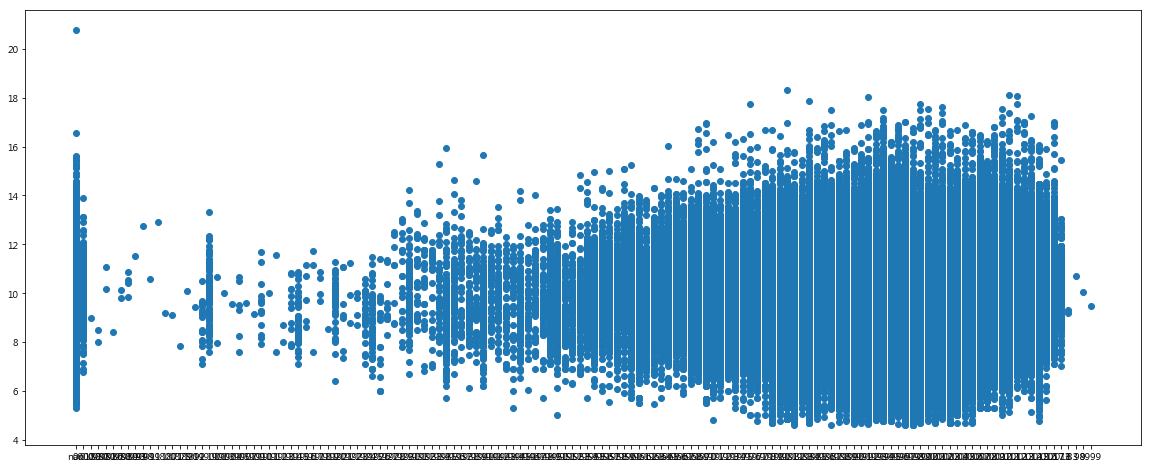

In [8]:
# 건축년도 별 거래금액
plt.figure(figsize=(20,8))
plt.scatter(df['yoc'], np.log(df['price']))
plt.show()

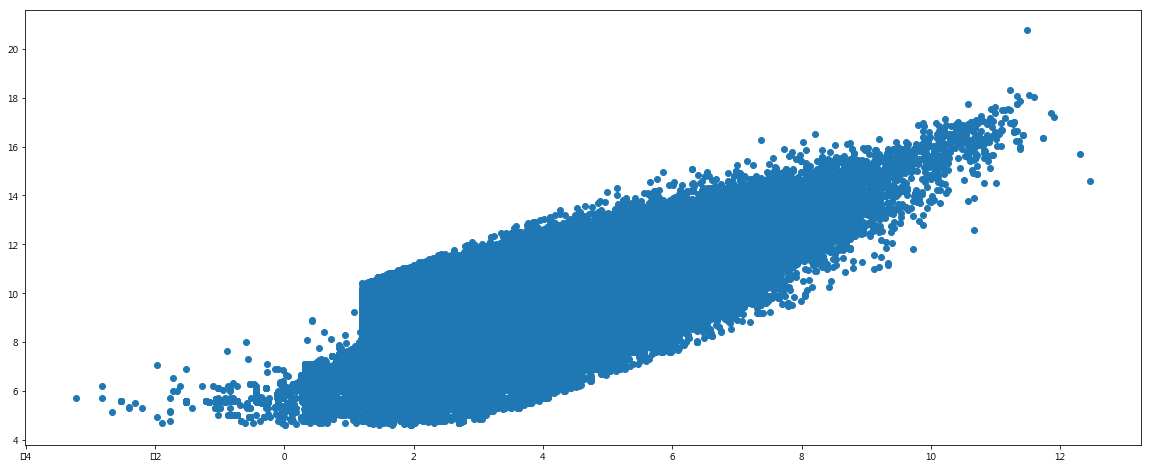

In [14]:
# 면적당 거래금액
plt.figure(figsize=(20,8))
plt.scatter(np.log(df['area']), np.log(df['price']))
plt.show()

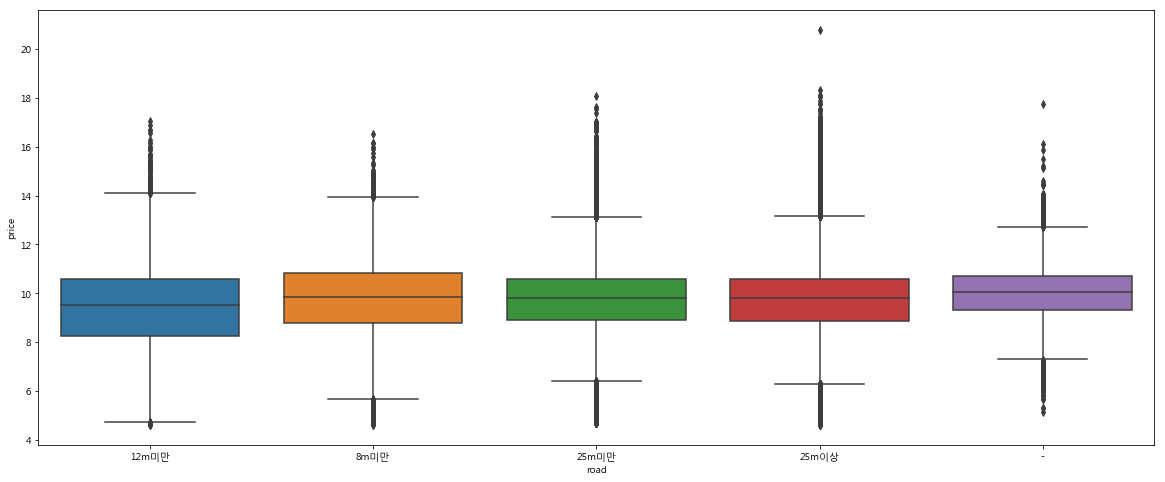

In [15]:
# 도로조건별 거래금액
plt.figure(figsize=(20,8))
sns.boxplot(x='road', y=np.log(df['price']), data=df)
plt.show()

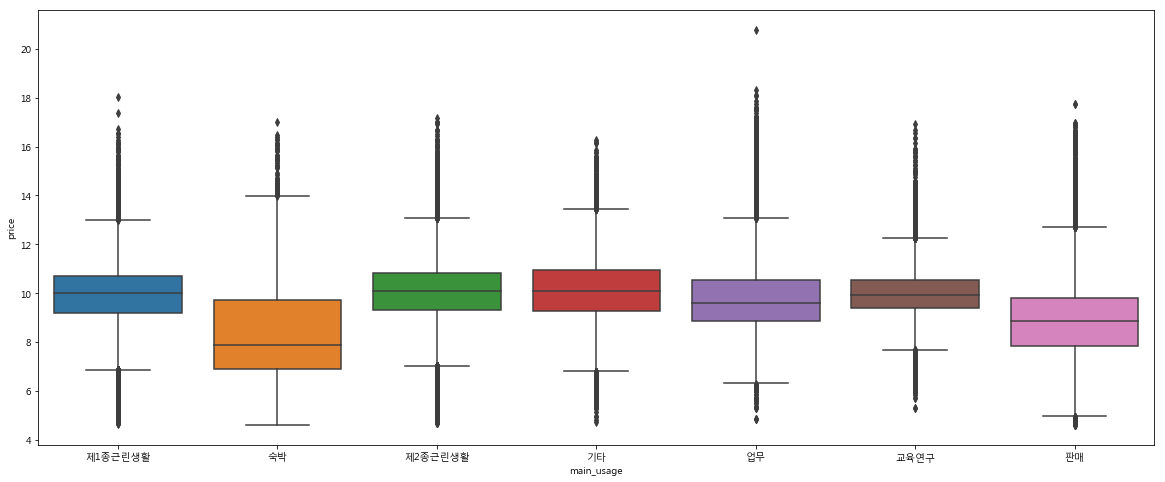

In [16]:
# 건물주용도별 거래금액
plt.figure(figsize=(20,8))
sns.boxplot(x='main_usage', y=np.log(df['price']), data=df)
plt.show()

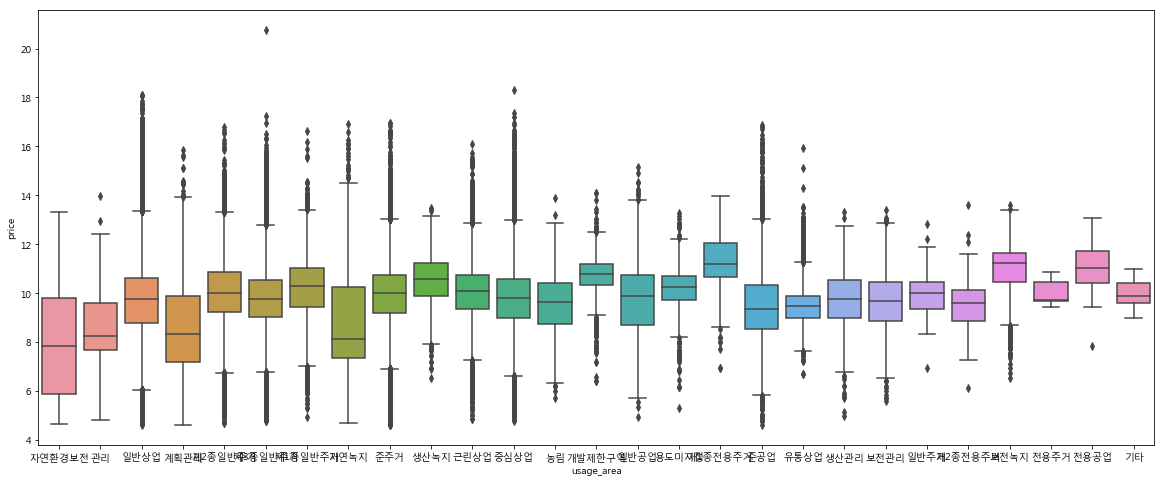

In [17]:
# 용도지역별 거래금액
plt.figure(figsize=(20,8))
sns.boxplot(x='usage_area', y=np.log(df['price']), data=df)
plt.show()

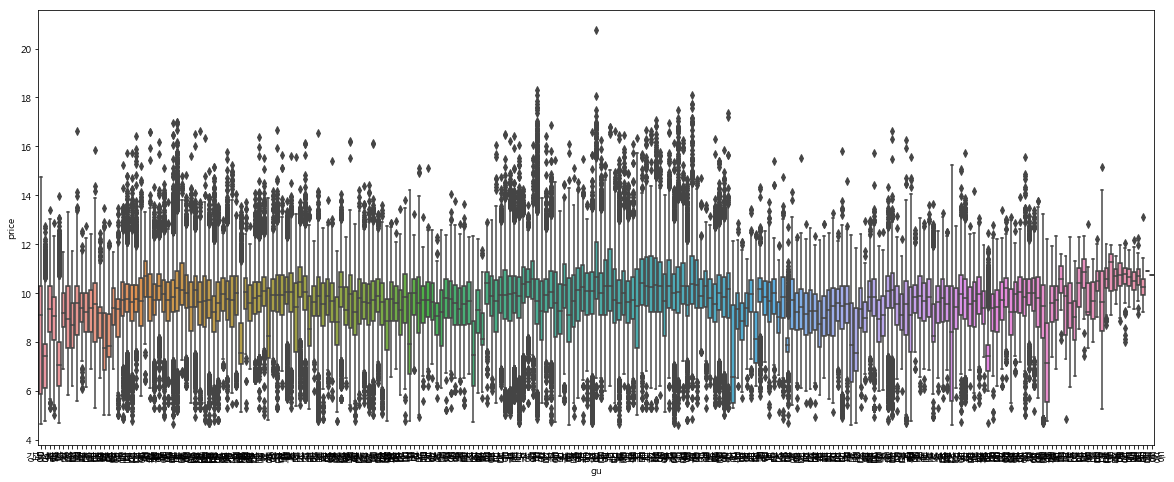

In [18]:
# 구별 거래금액
plt.figure(figsize=(20,8))
sns.boxplot(x='gu', y=np.log(df['price']), data=df)
plt.show()

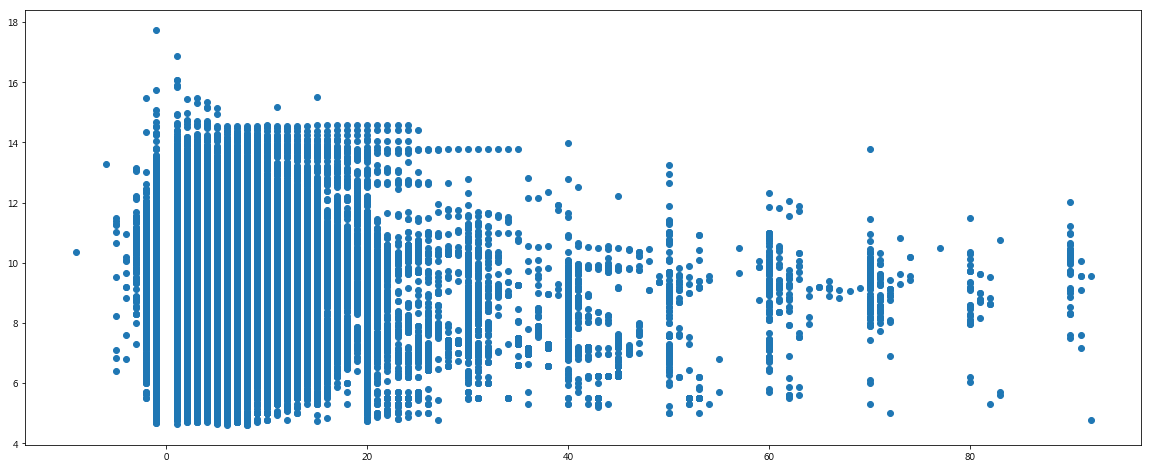

In [20]:
# 층별 거래금액
plt.figure(figsize=(20,8))
plt.scatter(df.loc[df['floor']!=' ',:]['floor'], np.log(df.loc[df['floor']!=' ',:]['price']))
plt.show()

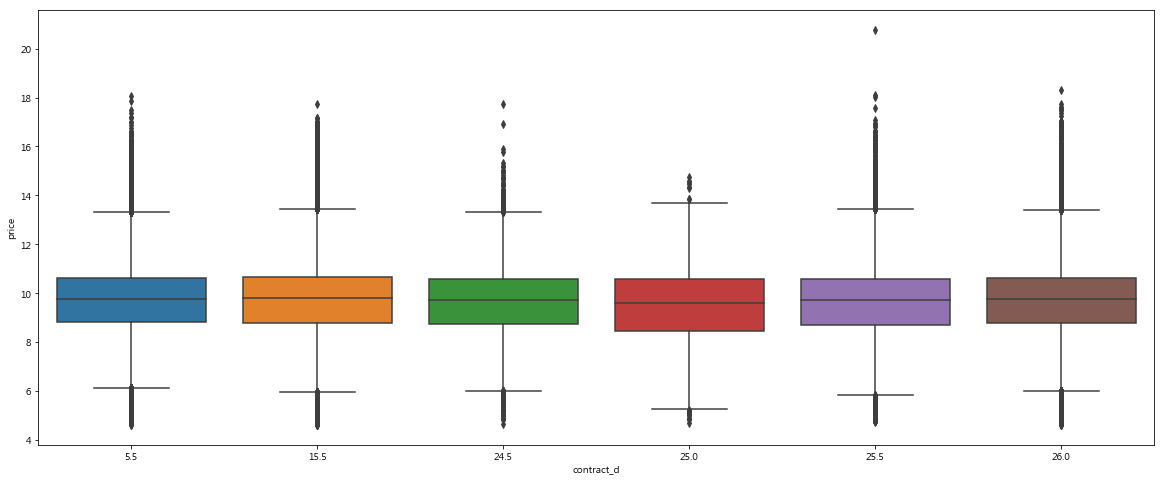

In [21]:
# 거래시점별 거래금액
plt.figure(figsize=(20,8))
sns.boxplot(x='contract_d', y=np.log(df['price']), data=df)
plt.show()

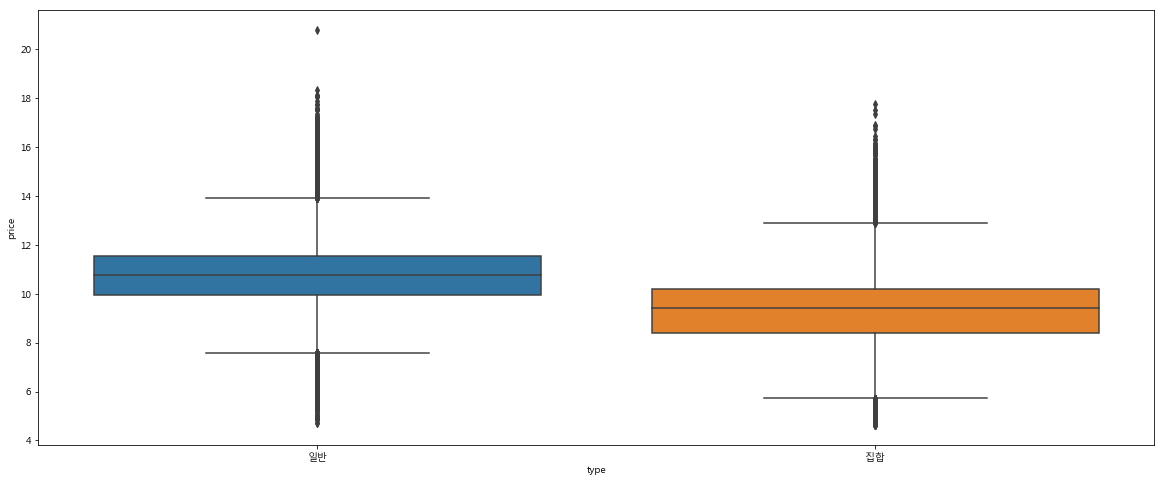

In [22]:
# 유형별 거래금액
plt.figure(figsize=(20,8))
sns.boxplot(x='type', y=np.log(df['price']), data=df)
plt.show()